In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.layers import Input, Dense

### Data import

In [2]:
X = np.load('../data/X.npy')
y = np.load('../data/y.npy')

### Data splitting

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2024, stratify=y)

### Logistic Regression

In [11]:
# Define GridSearch parameter grid

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'],
              'max_iter': [1000, 2000], 'class_weight': [None, 'balanced']}

In [12]:
# Initialize model

LR = LogisticRegression()

In [13]:
# Perform GridSearch

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 2000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [14]:
grid_search.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [15]:
# Select optimal parameters

model = grid_search.best_estimator_

In [21]:
# Display accuracy score

y_pred = model.predict(X_test)
print("Accuracy =", accuracy_score(y_test, y_pred))

Accuracy = 0.6316666666666667


### Neural Network

In [20]:
# Define network architecture

NN = keras.models.Sequential()
NN.add(Input(shape=(100,)))
NN.add(Dense(100, activation='relu'))
NN.add(Dense(50, activation='relu'))
NN.add(Dense(2, activation='softmax'))

In [22]:
# Compile network

NN.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,252 (59.58 KB)

 Trainable params: 15,252 (59.58 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Train model

h = NN.fit(X_train, y_train, batch_size=50, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5788 - loss: 0.6850 - val_accuracy: 0.6300 - val_loss: 0.6487
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.6699 - loss: 0.6194 - val_accuracy: 0.6500 - val_loss: 0.6367
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.6775 - loss: 0.6197 - val_accuracy: 0.6500 - val_loss: 0.6408
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6811 - loss: 0.6094 - val_accuracy: 0.6467 - val_loss: 0.6412
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.6842 - loss: 0.6088 - val_accuracy: 0.6483 - val_loss: 0.6489
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6678 - loss: 0.6205 - val_accuracy: 0.6500 - val_loss: 0.6385
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.6760 - loss: 0.6034 - val_accuracy: 0.6550 - val_loss: 0.6375
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.6763 - loss: 0.6010 - val_accuracy: 0.65

In [104]:
# Display accuracy score

NN.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.6585 - loss: 0.6448


[0.640751838684082, 0.6549999713897705]

In [118]:
# Get predictions

y_pred = NN.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


### Error visualization

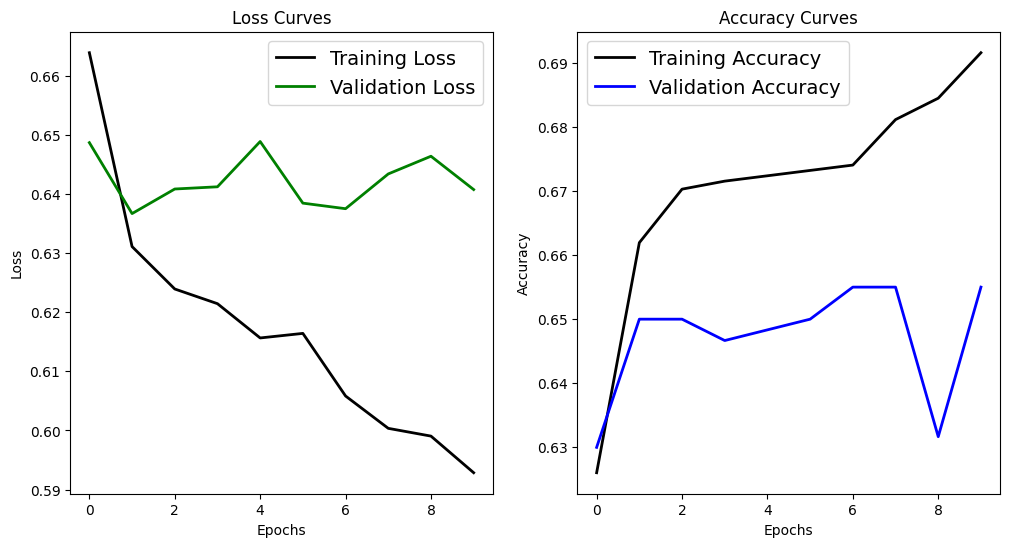

In [114]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# Loss curves
ax[0].plot(h.history['loss'], 'black', linewidth=2.0)
ax[0].plot(h.history['val_loss'], 'green', linewidth=2.0)
ax[0].legend(['Training Loss', 'Validation Loss'], fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=10)
ax[0].set_ylabel('Loss', fontsize=10)
ax[0].set_title('Loss Curves', fontsize=12)

# Accuracy curves
ax[1].plot(h.history['accuracy'], 'black', linewidth=2.0)
ax[1].plot(h.history['val_accuracy'], 'blue', linewidth=2.0)
ax[1].legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=10)
ax[1].set_ylabel('Accuracy', fontsize=10)
ax[1].set_title('Accuracy Curves', fontsize=12)

plt.show()

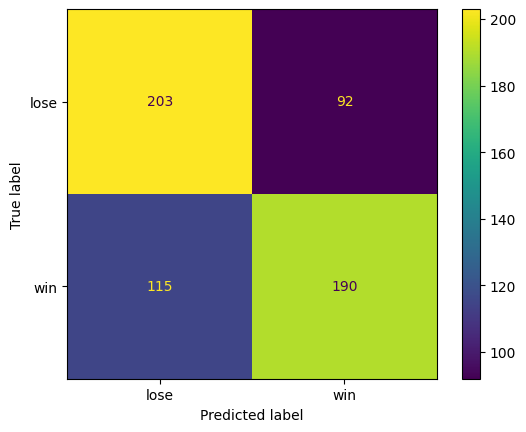

In [121]:
# Display confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['lose', 'win']).plot()
plt.show()

### Export model

In [129]:
NN.save('../models/legal_outcome_predictor.keras')